In [101]:
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt
from config import gkey
from config import api_key
from pprint import pprint
from scipy import stats as st

In [102]:
# Generate latitudes(-90 to 90) and longitudes(-180 to 180) using random number generator
#and form rough lat & long dataframe for cities selection
coor_df=pd.DataFrame({"lat":(np.random.uniform(-0.9,0.9,2000)*100), "long":(np.random.uniform(-1.8,1.8,2000)*100)})

coor_df.head()

,lat,long
0,-0.815630,84.010810
1,-79.538940,32.043644
2,-52.354679,90.863745
3,-60.003727,-26.391958
4,38.127742,125.147655


In [103]:
#Creat a rough city list with duplicates
cities=[]
countries=[]
c_df = coor_df.copy()

for i in range(0,len(coor_df['lat'])):
    lat=coor_df.iloc[i]["lat"]
    long=coor_df.iloc[i]["long"]
    
    city=citipy.nearest_city(lat,long)
    name=city.city_name
    cities.append(name)
    country=city.country_code
    countries.append(country)
    
c_df['City']=cities
c_df['Country']=countries
c_df.head()

,lat,long,City,Country
0,-0.815630,84.010810,hambantota,lk
1,-79.538940,32.043644,port elizabeth,za
2,-52.354679,90.863745,busselton,au
3,-60.003727,-26.391958,chuy,uy
4,38.127742,125.147655,seoul,kr


In [104]:
# Drop duplicate cities in 'City' and check if the cities number > 500
cities_df = c_df.drop_duplicates("City", keep='first', ignore_index= True)
#cities_df.to_csv("results/newcities.csv", encoding="utf-8", index=False)
len(cities_df)

719

In [105]:
cities_df.tail()

,lat,long,City,Country
714,25.193989,119.311132,jiangkou,cn
715,-39.458188,150.248822,lakes entrance,au
716,54.586369,25.338119,vilnius,lt
717,8.152043,-83.098435,burica,pa
718,37.988790,39.392010,cermik,tr


In [106]:
#creat the other necessary columns

cities_df["Temp"]=""
cities_df["Humidity"]= ""
cities_df["Cloudiness"] = ""
cities_df["Wind_Speed"] = ""

cities_df.head()

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

,lat,long,City,Country,Temp,Humidity,Cloudiness,Wind_Speed
0,-0.815630,84.010810,hambantota,lk,,,,
1,-79.538940,32.043644,port elizabeth,za,,,,
2,-52.354679,90.863745,busselton,au,,,,
3,-60.003727,-26.391958,chuy,uy,,,,
4,38.127742,125.147655,seoul,kr,,,,


In [107]:
temp = []
humi = []
cloud = []
wind = []
wcode ={800:5.0, 801:18.0, 802:37.0, 803:67.5, 804:92.5} #average value of each cloud_code repesented is used

In [108]:
#API loop to get all the values for temperature(F), humidity(%), cloudiness(%), and wind speed

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for index, row in cities_df.iterrows():
    city = row["City"]
    country = row["Country"]
    try:
        query_url = f"{url}appid={api_key}&units={units}&q={city},{country}"
        w_res = requests.get(query_url).json()
        cities_df.loc[index, "lat"] = float(w_res["coord"]["lat"])
        cities_df.loc[index, "long"] = float(w_res["coord"]["lon"])
        t = w_res["main"]["temp"]
        h = w_res["main"]["humidity"]
        w = w_res["wind"]["speed"]
        clouds_id = w_res["weather"][0]["id"]
        c = wcode.get(clouds_id)
        temp.append(t)
        humi.append(h)
        wind.append(w)
        cloud.append(c)
        print(f"{index}, {city} is ok, done")
    except:
        cities_df.loc[index, "lat"] = 0.01
        cities_df.loc[index, "long"] = 0.01
        temp.append(0.01)
        humi.append(0.01)
        wind.append(0.01)
        cloud.append(0.01)
        print(f"{index}, {city} is not found, skipped")
        pass

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0, hambantota is ok, done
1, port elizabeth is ok, done
2, busselton is ok, done
3, chuy is ok, done
4, seoul is ok, done
5, sisimiut is ok, done
6, hilo is ok, done
7, bengkulu is ok, done
8, igrim is ok, done
9, tanggu is ok, done
10, east london is ok, done
11, sao filipe is ok, done
12, taolanaro is not found, skipped
13, ponta delgada is ok, done
14, akureyri is ok, done
15, ushuaia is ok, done
16, mataura is not found, skipped
17, upata is ok, done
18, mys shmidta is not found, skipped
19, namibe is ok, done
20, upernavik is ok, done
21, irbit is ok, done
22, torbay is ok, done
23, ponta do sol is ok, done
24, balkanabat is ok, done
25, yellowknife is ok, done
26, zapolyarnyy is ok, done
27, port alfred is ok, done
28, henties bay is ok, done
29, salamanca is ok, done
30, springdale is ok, done
31, sterling is ok, done
32, les cayes is ok, done
33, bredasdorp is ok, done
34, atuona is ok, done
35, mogadishu is ok, done
36, jiuquan is ok, done
37, cadereyta is ok, done
38, avarua 

304, castro is ok, done
305, rocha is ok, done
306, khor is not found, skipped
307, biltine is ok, done
308, ewa beach is ok, done
309, aguimes is ok, done
310, halalo is not found, skipped
311, barrow is ok, done
312, ciudad bolivar is ok, done
313, waingapu is ok, done
314, caravelas is ok, done
315, superior is ok, done
316, hobyo is ok, done
317, aroysund is ok, done
318, juba is not found, skipped
319, mokhsogollokh is ok, done
320, limbe is ok, done
321, petropavlovsk-kamchatskiy is ok, done
322, padang is ok, done
323, kamenskoye is not found, skipped
324, karratha is ok, done
325, corrente is ok, done
326, el alto is ok, done
327, huazolotitlan is not found, skipped
328, vagur is ok, done
329, dalbandin is ok, done
330, lerwick is ok, done
331, mayo is ok, done
332, margaritas is ok, done
333, kalmunai is ok, done
334, tokur is ok, done
335, margate is ok, done
336, seondha is ok, done
337, torata is ok, done
338, attawapiskat is not found, skipped
339, hengshan is ok, done
340

602, toliary is not found, skipped
603, nizhniy odes is ok, done
604, wakefield is ok, done
605, derzhavinsk is ok, done
606, bonfim is ok, done
607, farsund is ok, done
608, taksimo is ok, done
609, northam is ok, done
610, shchelyayur is not found, skipped
611, sumenep is ok, done
612, kirkland lake is ok, done
613, belize is ok, done
614, anshun is ok, done
615, kasama is ok, done
616, hammerfest is ok, done
617, havelock is ok, done
618, blagoyevo is ok, done
619, makakilo city is ok, done
620, stamsund is not found, skipped
621, palmas is ok, done
622, pochutla is ok, done
623, palmer is ok, done
624, gandajika is ok, done
625, soyo is ok, done
626, labutta is not found, skipped
627, san-pedro is ok, done
628, ugoofaaru is ok, done
629, baiyin is ok, done
630, goedereede is ok, done
631, baturaden is ok, done
632, chernyshevskiy is ok, done
633, shumskiy is ok, done
634, bac lieu is ok, done
635, tarko-sale is ok, done
636, tetouan is ok, done
637, khorixas is ok, done
638, verdun

In [109]:
cities_df["Temp"] = temp
cities_df["Humidity"] = humi
cities_df["Cloudiness"] = cloud
cities_df["Wind_Speed"] = wind
#cities_df.to_csv("results/firstcities.csv", encoding="utf-8", index=False)
cities_df.head()

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,lat,long,City,Country,Temp,Humidity,Cloudiness,Wind_Speed
0,6.1241,81.1185,hambantota,lk,78.80,89.0,18.0,11.50
1,-33.9180,25.5701,port elizabeth,za,64.40,82.0,92.5,10.36
2,-33.6500,115.3333,busselton,au,80.01,45.0,37.0,4.43
3,-33.6971,-53.4616,chuy,uy,71.29,96.0,5.0,6.04
4,37.5683,126.9778,seoul,kr,50.00,53.0,5.0,8.05


In [110]:
#clean cities_df, after cleaning cities qty = 534
cities_df.dropna(how = "any", inplace = True)
new_df = cities_df.loc[cities_df["Temp"] != 0.01, :]
new_df.to_csv("results/cleancities.csv", encoding="utf-8", index=False)
len(new_df)

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


534

In [111]:
new_df.dtypes

lat           float64
long          float64
City           object
Country        object
Temp          float64
Humidity      float64
Cloudiness    float64
Wind_Speed    float64
dtype: object

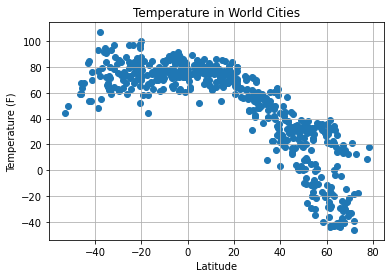

In [112]:
# Build a scatter plot for latitude vs temperature
plt.scatter(new_df["lat"], new_df["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("results/temperatureInWorldCities.png")

# Show plot
plt.show()

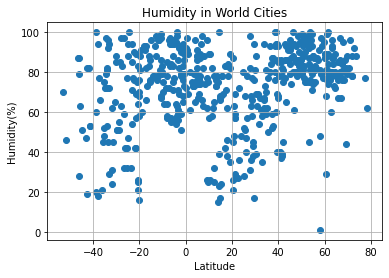

In [113]:
# Build a scatter plot for latitude vs humidity

plt.scatter(new_df["lat"], new_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("results/humidityInWorldCities.png")

# Show plot
plt.show()

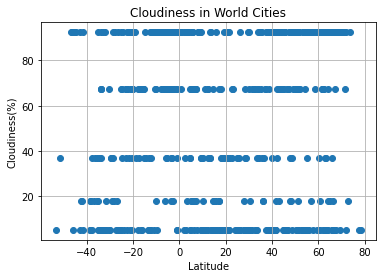

In [114]:
# Build a scatter plot for latitude vs cloudiness

plt.scatter(new_df["lat"], new_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("results/cloudinessInWorldCities.png")

# Show plot
plt.show()

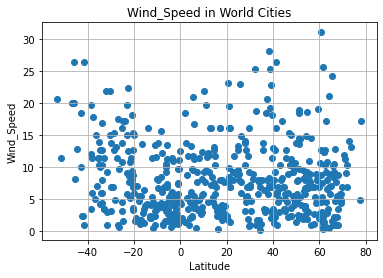

In [115]:
# Build a scatter plot for latitude vs wind speed

plt.scatter(new_df["lat"], new_df["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind_Speed in World Cities")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("results/Wind_SpeedInWorldCities.png")

# Show plot
plt.show()

In [116]:
#Comments regarding findings from today's(25/01/21) OPENWEATHERMAP API searching:
#temperature: South hemisphere most area in the range 60-100(F), North hemisphere from 60-85(F) to -60(F), the north the colder.
#Humidity: The most more than 70% cities in the world with humidity greater/equal = 60%
#Cloudiness: is irrelevant to latitude, any cloundiness can be in any places.
#Wind Speed: most of the world cities with wind speed below 15.

In [118]:
north_df = new_df.loc[(new_df["lat"] >= 0.0), :]
south_df = new_df.loc[(new_df["lat"] < 0.0), :]
north_df.to_csv("results/northcities.csv", encoding="utf-8", index=False)
south_df.to_csv("results/southcities.csv", encoding="utf-8", index=False)
south_df.head()

,lat,long,City,Country,Temp,Humidity,Cloudiness,Wind_Speed
1,-33.9180,25.5701,port elizabeth,za,64.40,82.0,92.5,10.36
2,-33.6500,115.3333,busselton,au,80.01,45.0,37.0,4.43
3,-33.6971,-53.4616,chuy,uy,71.29,96.0,5.0,6.04
7,-3.8004,102.2655,bengkulu,id,84.45,63.0,67.5,5.82
10,-33.0153,27.9116,east london,za,62.60,94.0,92.5,3.44


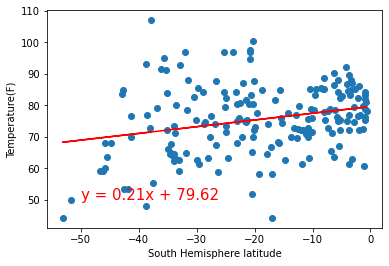

In [122]:
# Add the linear regression equation and line to plot south hemisphere lat vs temp
x_values = south_df.loc[:,'lat']
y_values = south_df.loc[:, 'Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('South Hemisphere latitude')
plt.ylabel('Temperature(F)')
plt.savefig("results/Temp_s_misphereCities.png")
plt.show()

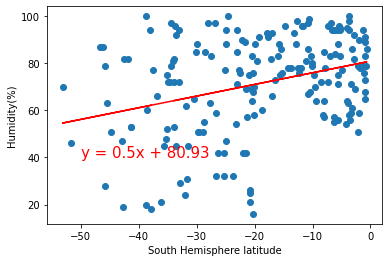

In [124]:
# Add the linear regression equation and line to plot south hemisphere lat vs humidity
x_values = south_df.loc[:,'lat']
y_values = south_df.loc[:, 'Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('South Hemisphere latitude')
plt.ylabel('Humidity(%)')
plt.savefig("results/Humi_s_misphereCities.png")
plt.show()

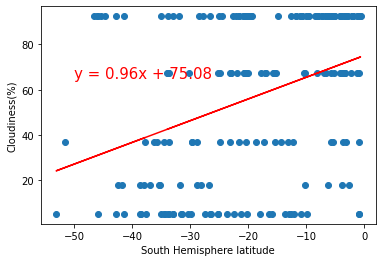

In [126]:
# Add the linear regression equation and line to plot south hemisphere lat vs Cloudiness
x_values = south_df.loc[:,'lat']
y_values = south_df.loc[:, 'Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.xlabel('South Hemisphere latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("results/Cloudiness_s_misphereCities.png")
plt.show()

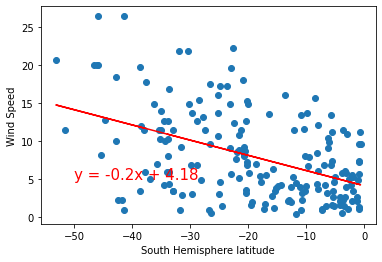

In [128]:
# Add the linear regression equation and line to plot south hemisphere lat vs wind_speed
x_values = south_df.loc[:,'lat']
y_values = south_df.loc[:, 'Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.xlabel('South Hemisphere latitude')
plt.ylabel('Wind Speed')
plt.savefig("results/Windspeed_s_misphereCities.png")
plt.show()

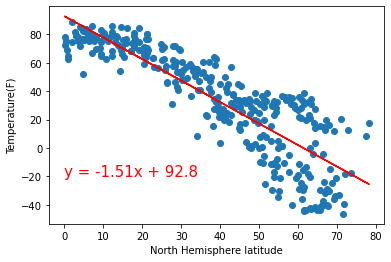

In [130]:
# Add the linear regression equation and line to plot north hemisphere lat vs temp
x_values = north_df.loc[:,'lat']
y_values = north_df.loc[:, 'Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('North Hemisphere latitude')
plt.ylabel('Temperature(F)')
plt.savefig("results/Temp_N_misphereCities.png")
plt.show()

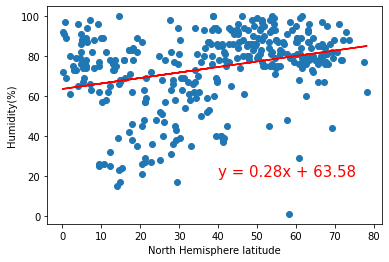

In [133]:
# Add the linear regression equation and line to plot north hemisphere lat vs humidity
x_values = north_df.loc[:,'lat']
y_values = north_df.loc[:, 'Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('North Hemisphere latitude')
plt.ylabel('Humidity(%)')
plt.savefig("results/Humi_N_misphereCities.png")
plt.show()

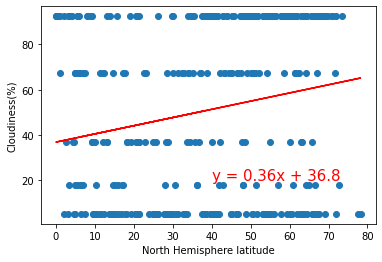

In [134]:
# Add the linear regression equation and line to plot north hemisphere lat vs cloudiness
x_values = north_df.loc[:,'lat']
y_values = north_df.loc[:, 'Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('North Hemisphere latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("results/Cloudiness_N_misphereCities.png")
plt.show()

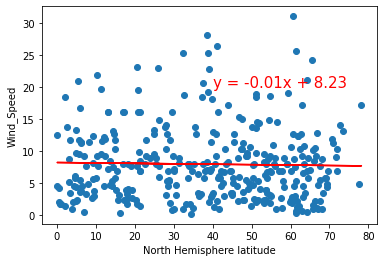

In [135]:
# Add the linear regression equation and line to plot north hemisphere lat vs wind_speed
x_values = north_df.loc[:,'lat']
y_values = north_df.loc[:, 'Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('North Hemisphere latitude')
plt.ylabel('Wind_Speed')
plt.savefig("results/Windspeed_N_misphereCities.png")
plt.show()

In [ ]:
#Comments:
#South Hemisphere: temp vs lat has no too much difference, in lack of anti_arctic data. Humidity is higher from south to the equator;
                #Cloudiness is higher near the equator; wind_speed looks lesser from south to the equator.
#North Hemisphere: temp vs lat has a very steep drop line from the equator to arctic, from 80(F) to about -35(F);
                # Humidity is higher at north, cloudiness is irrelevant to the lav; most of places wind_speed below 15. 